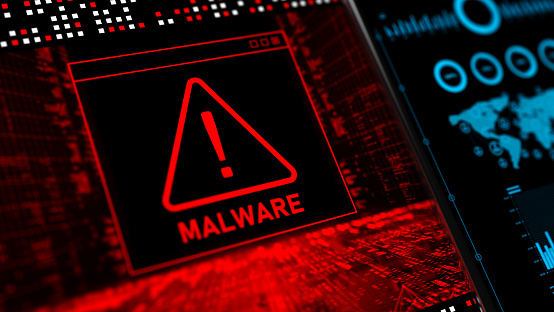

### Research paper : https://www.researchgate.net/publication/349704527_Virus-MNIST_A_Benchmark_Malware_Dataset

Download the original research paper of Virus Mnist detection through the above provided link. And read the research paper before moving ahead.

## Uncomment below cells and run all of them

### Download the data:- https://www.kaggle.com/datasets/datamunge/virusmnist
Unzip the file and upload the train.csv and test.csv file in colab.



# Problem

The problem is a Multiclass Classification Problem

The dataset used for this problem is VIRUS MNIST dataset


# Problem Statement

To classify the virus(malware) images using Convoluton Neural Net

# Dataset Description:

The dataset for image classification consisting of 10 classes of virus.

The dataset folder contains the following files:

train.csv: 48422 rows x 1026 columns

test.csv: 3458 rows x 1026 columns


The images are of size 32x32

The dataset already have pixels in 1 x 1024 columns.


True (Actual) label are encode with a single integer number

In [ ]:
# import all the necessary libraries
import pandas as pd
import numpy as np

# Load Dataset

In [ ]:
# reading dataset train, test
test = pd.read_csv('/content/test.csv')
train = pd.read_csv('/content/train.csv')

In [ ]:
# visualizing first five samples of train dataset
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel986,pixel987,pixel988,pixel989,pixel990,pixel991,pixel992,pixel993,pixel994,pixel995,pixel996,pixel997,pixel998,pixel999,pixel1000,pixel1001,pixel1002,pixel1003,pixel1004,pixel1005,pixel1006,pixel1007,pixel1008,pixel1009,pixel1010,pixel1011,pixel1012,pixel1013,pixel1014,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024,hash
0,3,212,1,77,204,137,117,139,161,199,180,40,137,1,108,0,0,0,77,112,255,199,181,0,254,141,232,255,38,137,137,137,145,164,114,255,255,255,193,141,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,aa527b5aea9fe96fabae78e85ba59491
1,0,0,19,3,233,127,0,70,1,233,58,0,222,5,233,75,0,169,4,233,222,0,39,1,233,122,0,120,4,233,179,0,43,204,204,204,204,204,204,204,...,68,28,210,110,20,226,106,45,34,237,22,181,110,19,184,110,19,184,164,96,23,60,182,238,72,160,197,247,100,225,104,28,233,150,115,173,126,27,64,05597db8265479234c8e15a7290cd7f0
2,1,0,181,232,0,0,141,133,255,221,139,228,141,254,195,232,68,106,24,198,198,255,232,141,232,255,0,106,139,89,141,6,141,2,69,232,0,4,114,232,...,89,0,233,236,216,233,236,57,55,52,59,48,13,42,106,59,63,50,54,61,48,38,58,192,17,54,0,53,55,58,116,223,203,183,56,59,62,50,51,b1375b03e66c56e9a733eaf3d2a5bdbd
3,5,130,109,153,224,84,51,235,254,64,72,20,176,145,238,17,86,17,239,93,179,81,69,95,235,1,4,128,160,190,75,138,158,228,24,17,57,136,239,12,...,255,113,31,183,113,255,255,0,64,0,255,113,31,183,31,255,113,255,183,31,255,113,255,183,31,183,113,255,183,31,183,113,255,113,31,183,113,255,113,78ccbc945556b3f2aefd13f6ca31dcde
4,1,81,141,255,232,0,198,247,221,0,116,141,0,77,255,48,0,141,252,141,254,32,255,84,0,148,21,38,0,68,131,89,69,132,46,193,0,131,199,255,...,233,207,163,233,216,73,236,62,157,2,59,216,51,205,174,57,35,58,50,159,62,113,57,61,7,55,145,60,48,34,61,69,36,48,133,61,147,178,60,0748ba9db029cbfa01d73d2ee45222bf


In [ ]:
# visualizing first five samples of test dataset
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel986,pixel987,pixel988,pixel989,pixel990,pixel991,pixel992,pixel993,pixel994,pixel995,pixel996,pixel997,pixel998,pixel999,pixel1000,pixel1001,pixel1002,pixel1003,pixel1004,pixel1005,pixel1006,pixel1007,pixel1008,pixel1009,pixel1010,pixel1011,pixel1012,pixel1013,pixel1014,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024,hash
0,2,0,199,51,23,0,0,227,255,127,0,8,230,198,77,221,139,139,134,0,235,131,221,196,8,69,0,88,116,77,3,116,137,0,105,152,230,164,170,80,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24ced6eb4c3b6b16e6d911401ca9b9bf
1,6,0,0,4,24,56,93,220,101,80,120,0,80,247,139,69,139,255,0,40,255,221,139,24,220,255,184,236,56,195,56,8,119,4,236,232,240,55,8,198,...,58,239,204,186,50,0,58,56,124,236,55,51,56,64,160,0,0,0,0,0,0,0,0,0,0,0,0,74,27,97,72,142,247,1,247,27,121,109,75,9c9133f89cf857325fd041ca8640d51b
2,9,116,139,255,244,252,137,139,139,255,175,92,63,248,52,182,81,182,71,255,192,255,141,255,255,68,137,0,188,255,76,255,252,8,211,0,255,255,133,59,...,149,176,156,230,177,213,119,76,243,59,229,113,55,116,69,88,234,16,224,5,4,96,239,157,183,173,135,247,243,155,108,73,3,105,85,183,102,171,7,13544f465094166da9ad6f04833c4a7f
3,1,64,195,0,80,0,200,139,51,84,210,80,232,255,255,255,141,0,131,141,69,255,49,254,232,252,255,198,75,139,141,185,141,137,200,207,16,71,42,48,...,0,0,34,236,233,226,236,211,71,63,128,50,54,58,14,84,146,168,63,52,58,106,62,114,32,144,49,51,170,184,64,158,0,52,55,38,65,174,245,351e6e7a74a58fe57b323925d30b3943
4,7,255,4,0,73,3,15,0,48,15,119,238,193,4,241,209,102,95,102,74,15,139,116,195,116,72,68,142,243,102,164,32,191,204,131,59,133,149,50,131,...,99,97,111,0,111,111,96,0,254,255,0,255,0,0,255,0,0,64,0,216,255,0,0,2,0,255,0,0,0,10,9,0,10,11,186,0,10,13,128,6b537c7aa5719b881e2039bb055fa09f


In [ ]:
# check the size of train and test dataset
print("Number of samples in train:",train.shape)
print("Number of samples in test:",test.shape)

Number of smaples in train:  48422
Number of smaples in test:  3458


In [ ]:
# check the number of classes and names of classes
print("Number of classes/labels:",train['label'].unique())
print("Number of classes/labels:",train['label'].nunique())


Number of classes/labels:  10
Names of classes/labels:  [3 0 1 5 6 8 2 7 9 4]


In [ ]:
# drop the 'hash' column
train.drop('hash',axis=1,inplace=True)
test.drop('hash',axis=1,inplace=True)

In [ ]:
# seperate train data and train labels
train_labels = train['label']
train_data =train.drop('label',axis =1)

In [ ]:
# seperate test data and test labels
test_labels = test['label']
test_data= test.drop('label',axis =1)

In [ ]:
# convert train data, test data, train labels and train label dataframe to numpy
train_data = train_data.to_numpy()
train_labels = train_labels.to_numpy()

test_labels = test_labels.to_numpy()
test_data =test_data.to_numpy()

# Let's resize and scale the images to save time in training

## What is the need to do resizing into 32x32?

The models we are going to use takes input image as 32x32 but we have data in form of 1x1024.

In [ ]:
# Define function to resize and scale an image
# parameters: image, label
def prep(image,label):

  # create an empty list for storing the resized image data
  im =[]
  # create a loop with range equal to length of image parameter
  for i in range(0,len(image)):

    # reshape and store individual image in a variable
    resh = image[i].reshape(32,32)
    # append the resized image data to empty list created above
    im.append(resh)

  # convert the resized data we got to numpy array
  image =np.array(im)

  # scale all the elements of numpy array by dividing them with 255.0
  image =image/255.0

  # return resized image data and label
  return image,label

In [ ]:
# pass train and test data for resizing and scaling respectively
test_data,test_labels = prep(test_data,test_labels)
train_data,train_labels = prep(train_data,train_labels)

# Ploting resized and scaled sample images

Ploting image data with their shape and true label as plot title

In [ ]:
# Function to show samples from a dataset
def show_samples(dataset, labels):
    columns = 3
    rows = 3

    fig = plt.figure(figsize=(16, 16))
    print(columns * rows, "Samples from the dataset")

    # Start iterating through the dataset and labels
    for i, (image_data, label) in enumerate(zip(dataset[:columns*rows], labels[:columns*rows]), 1):
        fig.add_subplot(rows, columns, i)  # Add subplot for each sample
        plt.imshow(np.squeeze(image_data))  # Display the image
        plt.title('Image shape: ' + str(image_data.shape) + " (" + str(label) + ")")

    plt.show()


9  samples from the dataset


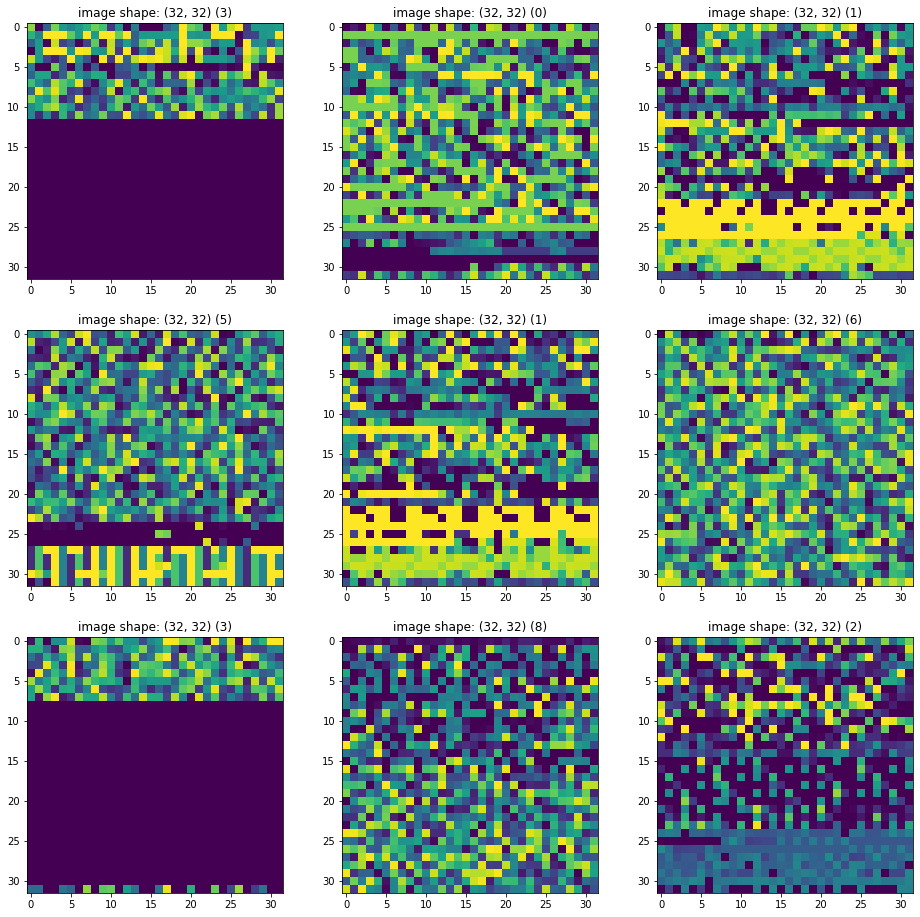

In [ ]:
# pass resized data to function we create to plot sample images
show_samples(train_data,train_labels)

In the above cell we plotted 9 images from the dataset to visualize them. Each image consist of a title representing its shape and respective label/class.

# Converting image data to RGB
The data we have is 32x32x1 i.e grayscale But the models we are going to use are pretrained on 3 dimensional images. Thus we need to convert these images to 3 dimensional images.

# Note:

Even though we converted the data to three dimensional image data, still the image in all the dimension is the same we are just repeating the same grayscale image 3 time so that it appears as 3 dimensional to model. It does not affect the performance of the model.

for example:


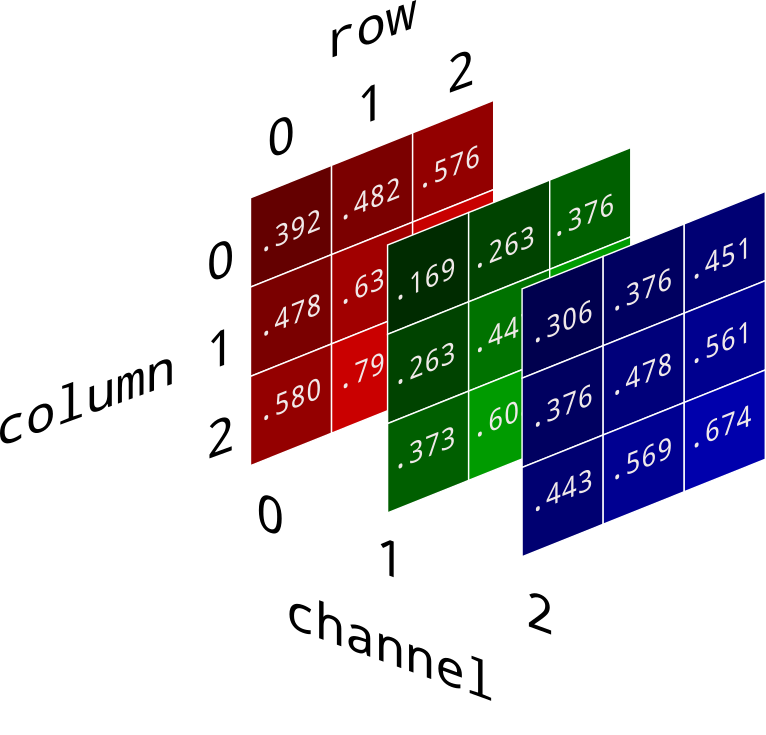


In the above image the image data is represented in RGB channels ie. 3 channel.
we will use the grayscale image and repeat that image 3 time for converting it to 3 channels. the same image matrice will be at channel 0, channel 1 and channel 2


In [ ]:
# Define a function to change the dim of image from 1 to 3 i.e grayscale to RGB
# parameters: image, scale_to_dim --> by default is None and 3 for RGB

  '''
  convert the numpy array to 3 dimensional by repeating each individual image data 3 times
  use numpy.repeat(arr[..., numpy.newaxis], repeats=3, axis = -1)
  '''


  # return image after changed dimension
def change_image_dim(image, scale_to_change_dim=3):
    # Repeat the grayscale channel 3 times to convert it to RGB format
    image = np.repeat(image[..., np.newaxis], scale_to_change_dim, axis=-1)
    return image

# Note :
In the above cell we used numpy.repeat to repeat the image pixel data to form 3 dimensional data from 1 dimensional image data. The ... in arr...] is used to make the repeat function to automaticaly select the number of indices the array has. If we use arr[:] than we need to specify how many indices we have
for example:
    
arr = [[0 1 2]  
      [3 4 5]]

arr[:,:, numpy.newaxis] --> for two dimensional array to convert into

arr = [[[0]  
  [1]  
  [2]]

 [[3]  
  [4]  
  [5]]]
  
and for 3 dimension -->  :,:,: and for 4 --> :,:,:,: so instead of using colons again and again we can use ... operator
  
and we need to repeat each element 3 times to form R,G,B
 values

so after using numpy.repeat(arr[..., numpy.newaxis], repeats=3, axis = -1)

we will get array in such a way:

arr = [[[0 0 0]  
  [1 1 1]  
  [2 2 2]]

 [[3 3 3]  
  [4 4 4]  
  [5 5 5]]]


In [ ]:
# pass train and test data to change from 1 to 3 dimensional image data
train_data_rgb = np.array([change_image_dim(img) for img in train_data])
test_data_rgb = np.array([change_image_dim(img) for img in test_data])

9  samples from the dataset


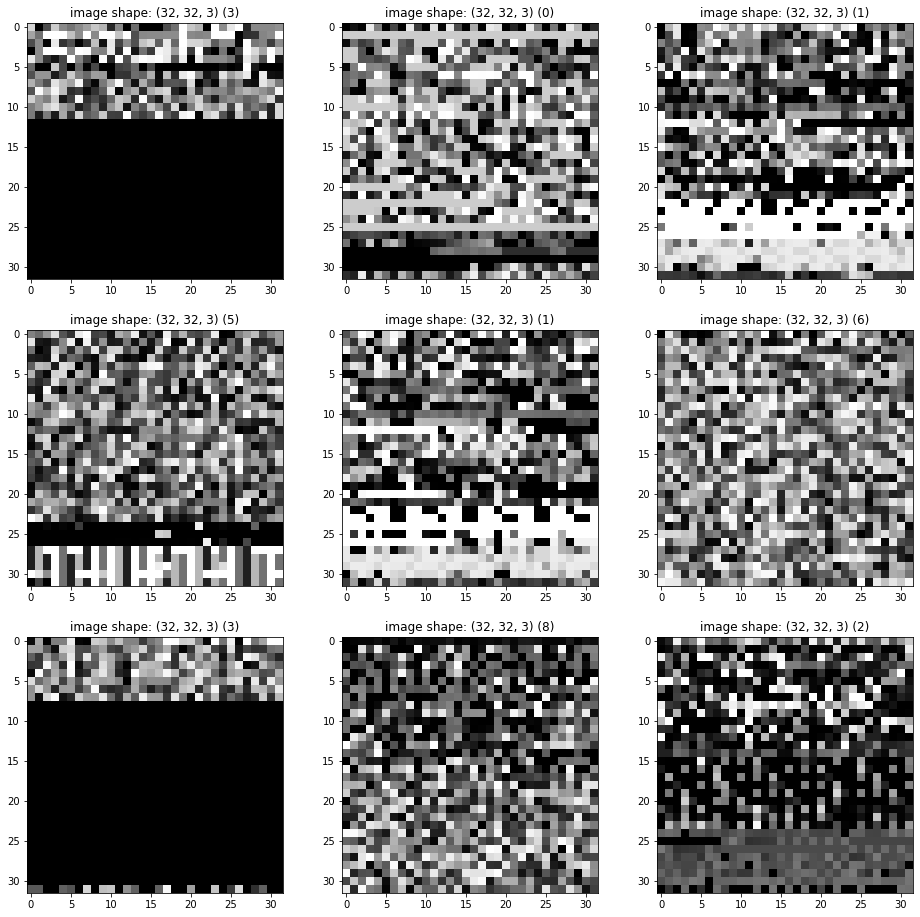

In [ ]:
# pass resized, scaled and 3 dimesnional data to plot sample images using function we created above
show_samples(train_data_rgb, train_labels)

In the above cell we plotted 9 images from the dataset to visualize them. Each image consist of a title representing its shape and respective label/class.

### Note:
you can see that each image title shows 3 channel as images channel.

# To train faster we will be using Transer Learning with

## MobileNetV2 Model

MobileNet is a CNN architecture model for Image Classification and Mobile Vision. As compared to other models, running or applying transfer learning using  MobileNet consumes very less omputation power. Thus it can be used on devices such as Mobile devices, embedded systems and computers wthout GPU or low specification.
It runs well on browser as browser have computational limitation.


In [ ]:
# Define the input shape
input_shape = (32, 32, 3)

# Load the pre-trained MobileNetV2 model, excluding the top (dense layers) and loading ImageNet weights
base_model = keras.applications.MobileNetV2(input_shape=input_shape, weights='imagenet', include_top=False)

# Freeze the base model (no training on these layers)
base_model.trainable = False

In [ ]:
# create a variable and store number of classes i.e 10 classes in this case
classes =10

In [ ]:
base_model = keras.applications.MobileNetV2(input_shape=input_shape, weights='imagenet', include_top=False)

# Freeze the base model
base_model.trainable = False

# Define inputs
inputs = tf.keras.Input(shape=(32, 32, 3))

# Pass the inputs through the base model
x = base_model(inputs, training=False)

# Add a global average pooling layer
x = tf.keras.layers.GlobalAveragePooling2D()(x)

# Define the initializer
initializer = tf.keras.initializers.GlorotUniform(seed=42)

# Define the activation function
activation = 'sigmoid'

# Add the output layer
outputs = tf.keras.layers.Dense(classes, kernel_initializer=initializer, activation=activation)(x)

# Create the model
model = tf.keras.Model(inputs, outputs)

# Note:
The last layer has 10 number of classes unit. So the output(predicted labels) will be 10 floating points as the actual label is a single integer number.

For the last layer, the activation function can be:
1. None
2. sigmoid
3. softmax

When there is no activation function used inthe model's last layer, we need to set from_logits=True in cross-entropy loss function during compiling model. This loss function will apply sigmoid transformation on predicted label values

### Let's see the model summary

In [ ]:
# visualize modle summary
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 1, 1, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 10)                12810     
                                                                 
Total params: 2,270,794
Trainable params: 12,810
Non-trainable params: 2,257,984
_________________________________________________________________



We used a tf.keras.layers.GlobalAveragePooling2D layer to convert the features to a single 1280-element vector per image.

We applied a tf.keras.layers.Dense layer to convert these features into a 10 prediction per image.

### Note : The 2,257,984 parameters in MobileNet are frozen, but there are 12,810 trainable parameters in the Dense layer.

# Note:

The 'None' values in the output shapes of the layers: a reminder that the model expects the input to have a batch size as the outermost dimension, which in this case can be flexible due to the None value.

The model takes input of 32x32x3 shaped images.

The

## Compile the model

Compile the model before training it. Since there are 10 classes, use the tf.keras.losses.SparseCategoricalCrossentropy loss with from_logits=True (if activation function is not mentioned while creating model) since the model provides a linear output

In [ ]:
# Compile the model by passing loss, optimizer and metrics
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# IMPORTANT:
We need to use tf.keras.metrics.SparseCategoricalAccuracy() for measuring accuracy since it calculates how often prediction match integer labels.

If you select mistakenly categorical cross entropy as loss function in a binary classification and if you do not specify a particular accuracy metric by just writing

metrics = "Accuracy"

Keras will wrongly infer that you are interested in the categorical_accuracy, and this is what it returns - while in fact you are interested in the binary_accuracy since our problem is a binary classification

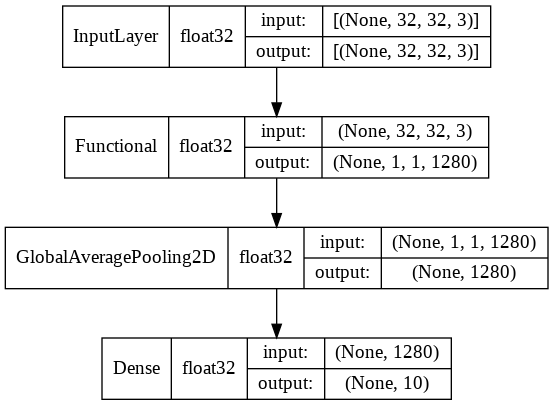

In [ ]:
from keras.utils.vis_utils import plot_model

# Plot the model and save it as 'model_plot.png'
plot_model(model, to_file='model_plot.png', show_layer_names=True, show_shapes=True, show_dtype=True)


In [ ]:
# Import train_test_split from sklearn library
from sklearn.model_selection import train_test_split
# split train data into train and valid set
X_train,x_val,y_train,y_val=train_test_split(train_data,train_labels,test_size=0.33,random_state=42)

# Try fitting the modle see what results we get

In [ ]:
# Fit the model upto 10 epochs with dataset and other required parameters
history = model.fit(X_train,y_train,validation_data=(x_val,y_val),epochs=10)

Epoch 1/10
2028/2028 [==============================] - 50s 25ms/step - loss: 1.4938 - sparse_categorical_accuracy: 0.5325 - val_loss: 1.3498 - val_sparse_categorical_accuracy: 0.5615
Epoch 2/10
2028/2028 [==============================] - 48s 24ms/step - loss: 1.2986 - sparse_categorical_accuracy: 0.5805 - val_loss: 1.2712 - val_sparse_categorical_accuracy: 0.5811
Epoch 3/10
2028/2028 [==============================] - 48s 24ms/step - loss: 1.2447 - sparse_categorical_accuracy: 0.5961 - val_loss: 1.2386 - val_sparse_categorical_accuracy: 0.5907
Epoch 4/10
2028/2028 [==============================] - 48s 24ms/step - loss: 1.2178 - sparse_categorical_accuracy: 0.5995 - val_loss: 1.2226 - val_sparse_categorical_accuracy: 0.5900
Epoch 5/10
2028/2028 [==============================] - 49s 24ms/step - loss: 1.2015 - sparse_categorical_accuracy: 0.6019 - val_loss: 1.2096 - val_sparse_categorical_accuracy: 0.5865
Epoch 6/10
2028/2028 [==============================] - 48s 24ms/step - loss: 1.

After training for 10 epochs, you should see approximately 60% accuracy on the validation set and loss approximately 1.2

# Visualize the Loss of model

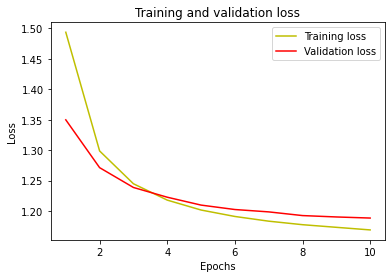

In [ ]:
import matplotlib.pyplot as plt

# Assuming `history` is the output of model.fit(), which contains training history
loss = history.history['loss']
val_loss = history.history['val_loss']

# Define the number of epochs
epochs = range(1, len(loss) + 1)

# Plot training and validation loss
plt.plot(epochs, loss, color='b', label='Train Loss')
plt.plot(epochs, val_loss, color='r', label='Validation Loss')

# Add a title and legend to the plot
plt.title('Training vs Validation Loss')
plt.legend()

# Show the plot
plt.show()


The plot shows the reduction in loss after training model for 10 epochs. Till the end of teh 10th epoch the loss
reduced from approx 1.35 to approx 1.16 on training set and approx 1.5 to approx 1.2 on validation set.

# Visualize the Accuracy of model

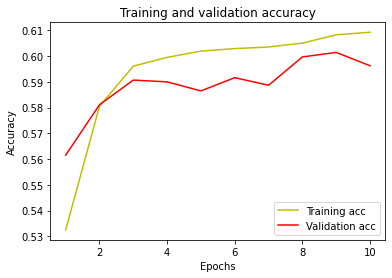

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' is from model.fit() and contains accuracy values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Define the number of epochs
epochs = range(1, len(acc) + 1)

# Plot training and validation accuracy
plt.plot(epochs, acc, color='b', label='Train Accuracy')
plt.plot(epochs, val_acc, color='r', label='Validation Accuracy')

# Add a title and legend to the plot
plt.title('Training and Validation Accuracy')
plt.legend()

# Show the plot
plt.show()


The plot shows the increase in accuracy after training model for 10 epochs. Till the end of teh 10th epoch the accuracy increased from approx 54% to approx 60% on training set and approx 56% to approx 59% on validation set.

In [ ]:
# make prediction on test set
pred = model.predict(test_data)

In [ ]:
# Evaluate the modle on test set
results = model.evaluate(test_data,test_labels,batch_size=10)
results

217/217 [==============================] - 4s 16ms/step - loss: 1.1817 - sparse_categorical_accuracy: 0.5928
[1.1817173957824707, 0.5928282141685486]


After evaluating the model on test set we got the accuracy approx 59%

In [ ]:
for (pre, y_true) in zip(pred[:15], test_labels[:15]):
    print(f'Predicted: {np.argmax(pre)}, Actual label: {y_true}')


predicted:  2 Actual label:  2
predicted:  6 Actual label:  6
predicted:  6 Actual label:  9
predicted:  1 Actual label:  1
predicted:  7 Actual label:  7
predicted:  6 Actual label:  8
predicted:  9 Actual label:  9
predicted:  7 Actual label:  7
predicted:  2 Actual label:  7
predicted:  6 Actual label:  6
predicted:  1 Actual label:  1
predicted:  2 Actual label:  2
predicted:  6 Actual label:  6
predicted:  6 Actual label:  6
predicted:  5 Actual label:  8


From above cell we can consider that the prediction made by the model are coorect for more than 50% of the data. the accuarcy is still not excellent but its working fine.

# Project Summary

When dealing with multi-class classification problem:

1. we can use integer numbers or one-hot-encoding to encode the true classes/label
2. The correct accuracy meterics depends on the selected true label encoding.
3. Last layer activation function could be Sigmoid, Softmax or None
4. The correct loss function should be decided acording to the selected true label encoding

# Conclusion

We used transfer learning by importing MobileNetV2.
Training model after  resizing, scaling, selecting the correct loss and activation function we got an accuary of approx to 60% and training loss of 1.17.

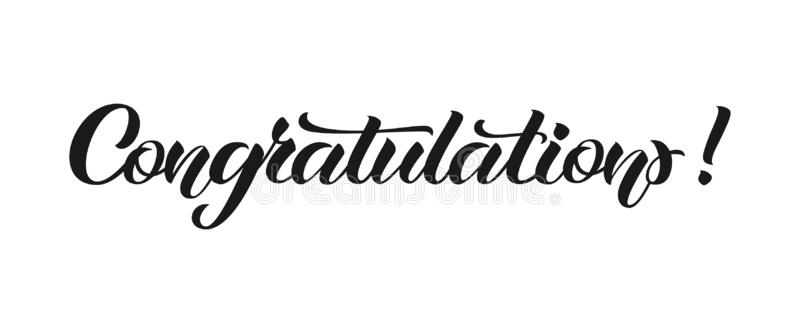

## You have completed this project and now you are able to implement model training using transfer learning and got good knowledge of building projects.

## Feedback

Please fill the below feedback form about this assignment

https://forms.zohopublic.in/cloudyml/form/CloudyMLDeepLearningFeedbackForm/formperma/VCFbldnXAnbcgAIl0lWv2blgHdSldheO4RfktMdgK7s